In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as fit
pi = np.pi
from astropy.table import Table

In [23]:
# 1.1

temp_data = pd.read_csv("GlobalLandTemperaturesByState.csv")
temp_data = temp_data.drop(['Country', 'AverageTemperatureUncertainty'], axis=1)

temp_data = temp_data.sort_values(by='dt', ascending = True)

temp_data = temp_data.where(temp_data['dt']>='2000')
temp_data = temp_data.dropna()

wyoming = temp_data[temp_data['State'].str.startswith('Wyoming')]
nebraska = temp_data[temp_data['State'].str.startswith('Nebraska')]
south_dakota = temp_data[temp_data['State'].str.startswith('South Dakota')]

sorted_temps = pd.concat([wyoming, nebraska, south_dakota])
sorted_temps

,dt,AverageTemperature,State
626275,2000-01-01,-4.290,Wyoming
626276,2000-02-01,-1.310,Wyoming
626277,2000-03-01,1.015,Wyoming
626278,2000-04-01,5.927,Wyoming
626279,2000-05-01,10.958,Wyoming
...,...,...,...
527354,2013-05-01,13.795,South Dakota
527355,2013-06-01,19.085,South Dakota
527356,2013-07-01,22.649,South Dakota
527357,2013-08-01,22.501,South Dakota


In [24]:
# 1.2

mean_temp = sorted_temps.groupby('dt')['AverageTemperature'].mean()
avg_temps = pd.DataFrame(mean_temp).reset_index()
avg_temps

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


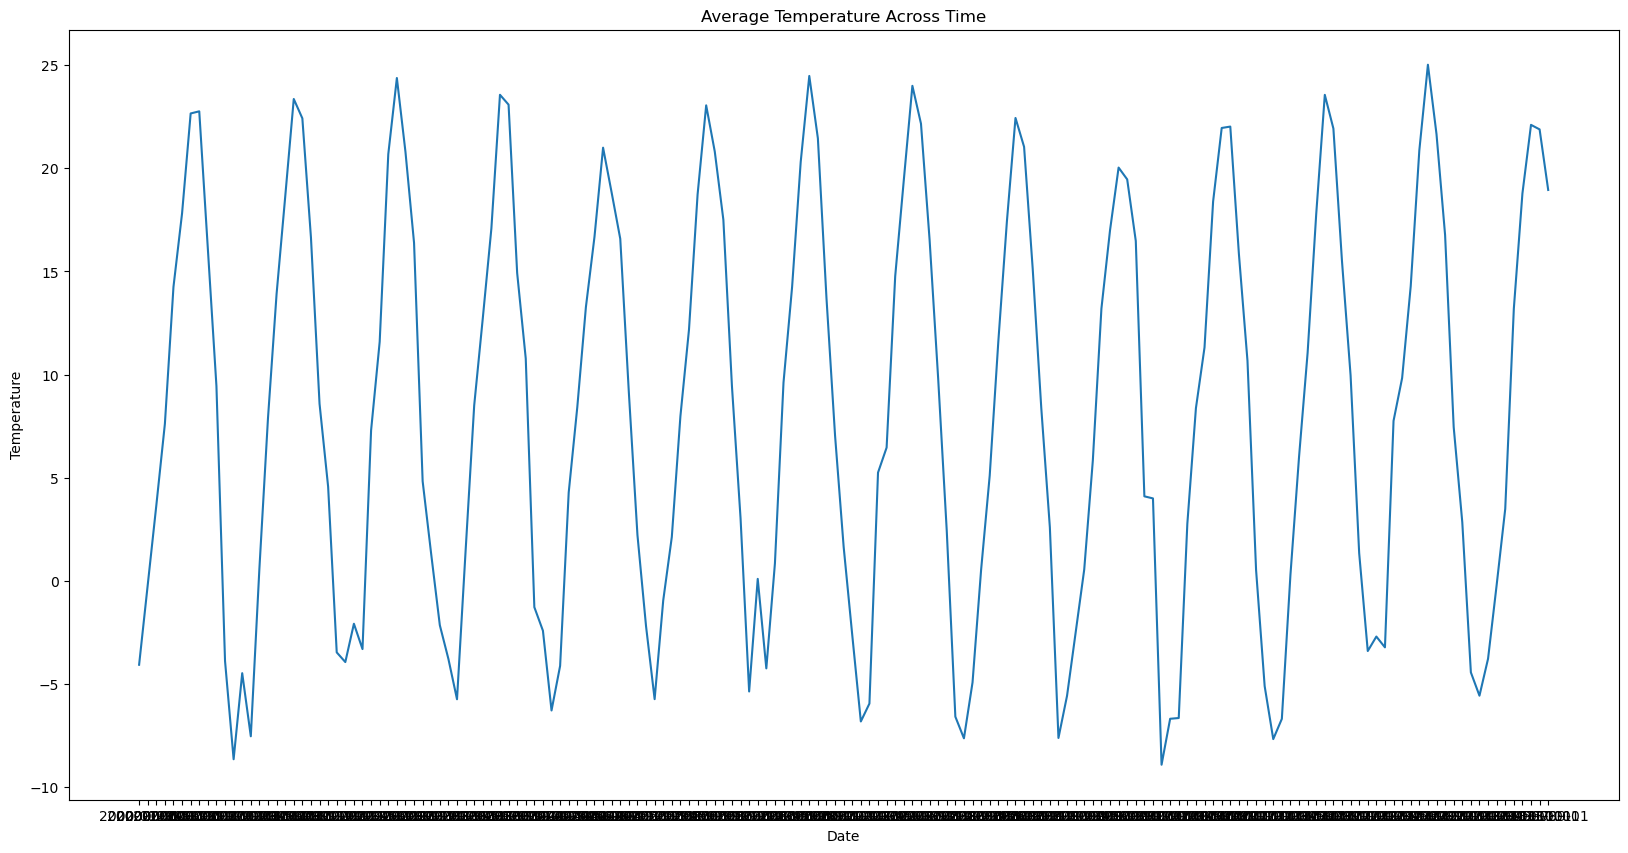

In [25]:
# 1.3

plt.figure(figsize=(20,10))
plt.plot(avg_temps['dt'], avg_temps['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Average Temperature Across Time')
plt.show()

In [26]:
# 1.4

# sorted_temps['Day'] = sorted_temps['dt'].astype(int)
# sorted_temps['Day'] = pd.to_numeric(sorted_temps['dt'])

days = np.arange(0, len(avg_temps))
avg_temps['Day'] = days
avg_temps

,dt,AverageTemperature,Day
0,2000-01-01,-4.072000,0
1,2000-02-01,-0.205000,1
2,2000-03-01,3.642667,2
3,2000-04-01,7.609667,3
4,2000-05-01,14.255000,4
...,...,...,...
160,2013-05-01,13.196000,160
161,2013-06-01,18.783667,161
162,2013-07-01,22.110333,162
163,2013-08-01,21.890000,163


In [27]:
# 1.5

def f(x, a, b, c, d):
    return a*np.sin(b*(x) + c) + d

In [28]:
# 1.6

p0 = [22, 2*pi/12, -1*pi/2, 10]
params, cov = fit.curve_fit(f, avg_temps['Day'], avg_temps['AverageTemperature'], p0)

a = params[0]
b = params[1]
c = params[2]
d = params[3]

temp_est = f(avg_temps['Day'], a, b, c, d)

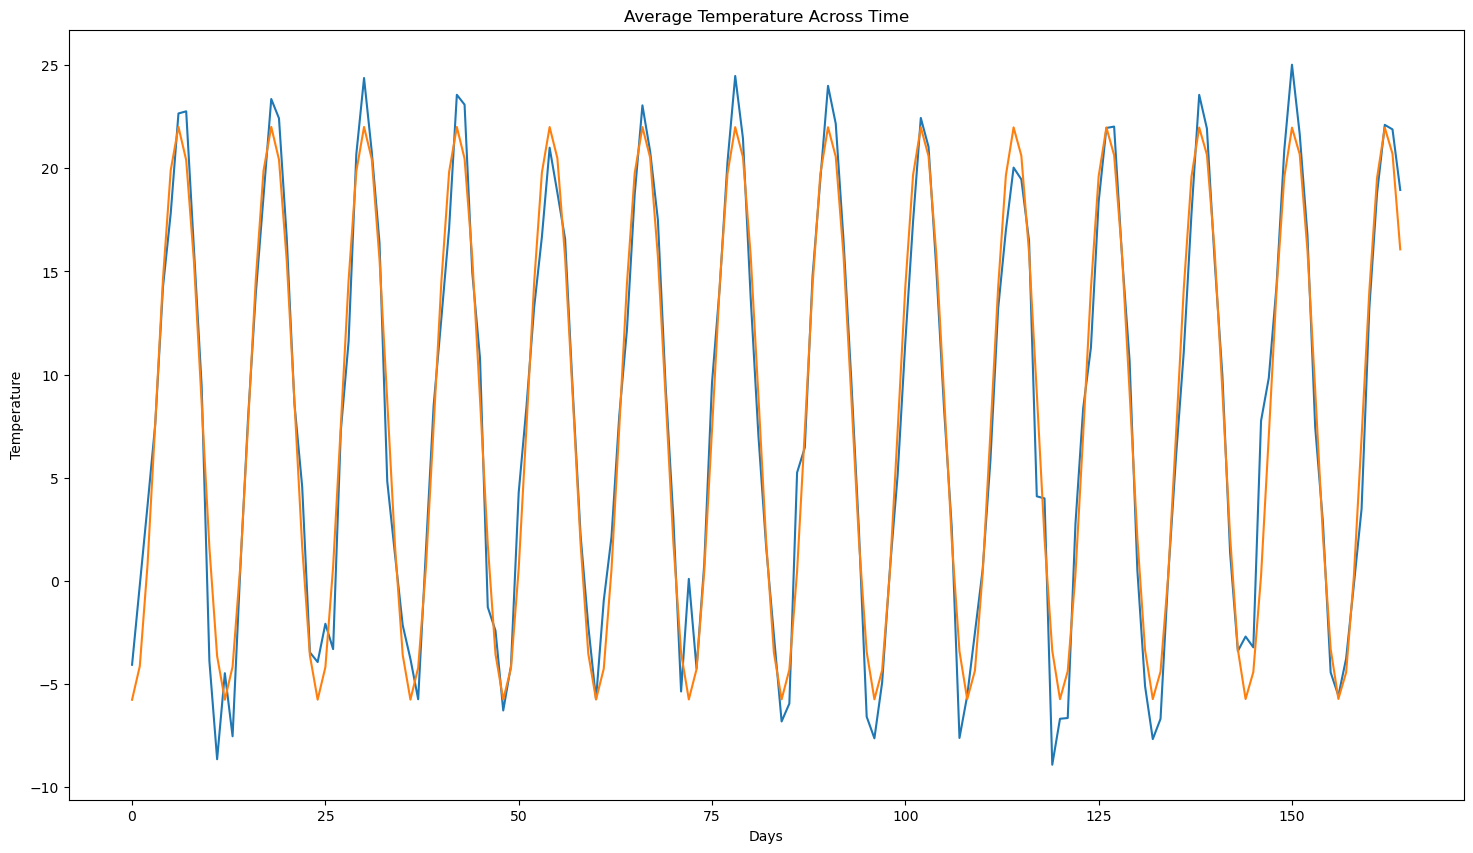

In [29]:
# 1.7

plt.figure(figsize=(18,10))
plt.plot(avg_temps['Day'], avg_temps['AverageTemperature'])
plt.plot(avg_temps['Day'], temp_est)
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Average Temperature Across Time')
plt.show()

In [54]:
# 1.8

errors = []
for i in range(len(cov)):
    errors.append(cov[i][i]**0.5)

errors

[0.22609128273991594,
 0.0003465545193918657,
 0.03279945010225768,
 0.16050591279460905]

In [53]:
# 1.9

a_state = f"a: {a} +/- {errors[0]}"
b_state = f"b: {b} +/- {errors[1]}"
c_state = f"c: {c} +/- {errors[2]}"
d_state = f"d: {d} +/- {errors[3]}"

statements = [a_state, b_state, c_state, d_state]
statements

['a: 13.899598480916051 +/- 0.22609128273991594',
 'b: 0.5232810738849062 +/- 0.0003465545193918657',
 'c: -1.6038938808330752 +/- 0.03279945010225768',
 'd: 8.122950283731845 +/- 0.16050591279460905']

In [100]:
equation1 = f"{a}*sin({b}*x + {c}) + {d}"
equation1

'13.899598480916051*sin(0.5232810738849062*x + -1.6038938808330752) + 8.122950283731845'

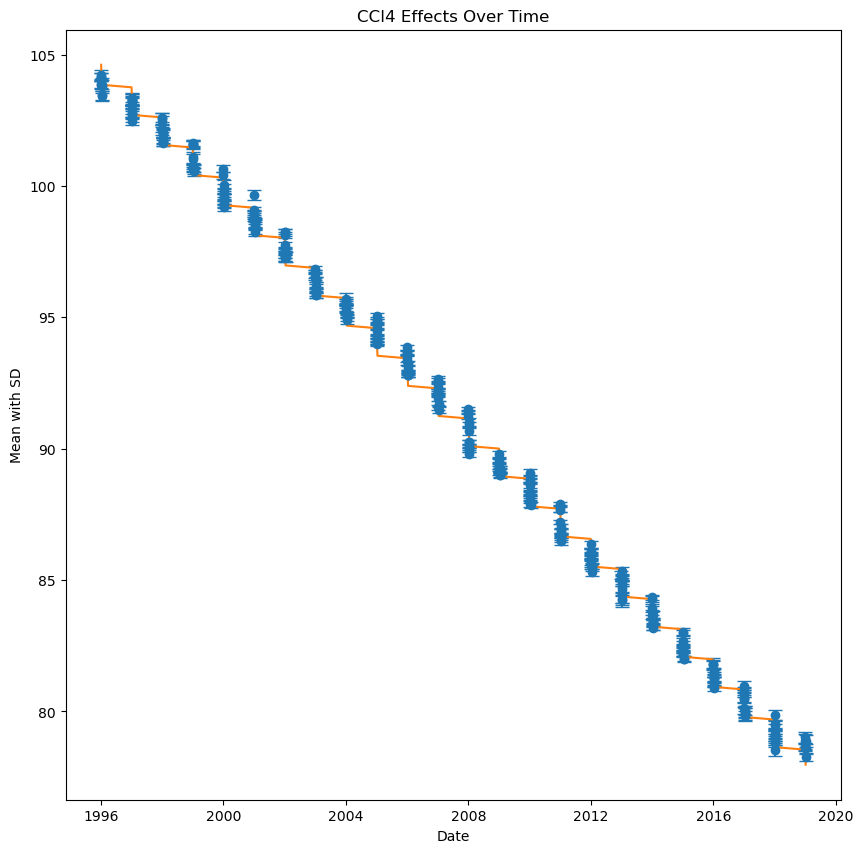

In [91]:
# 1.10

CCl4 = Table.read('global_CCl4_MM.dat', format='ascii', header_start=0)
CCl4_data = pd.DataFrame({'Year': CCl4.field(0), 'Day': CCl4.field(1), 'Global mean concentration': CCl4.field(6), 'Global standard deviation': CCl4.field(7)})
CCl4_data = CCl4_data.dropna()
CCl4_data['Date'] = pd.to_datetime(CCl4_data['Year'].astype(str) + '-' + CCl4_data['Day'].astype(str), format='%Y-%d')

plt.figure(figsize=(10,10))
plt.errorbar(CCl4_data['Date'], CCl4_data['Global mean concentration'], CCl4_data['Global standard deviation'], fmt='o', capsize=5)
plt.plot(CCl4_data['Date'], mean_est)
plt.xlabel('Date')
plt.ylabel('Mean with SD')
plt.title('CCl4 Effects Over Time')
plt.show()

In [90]:
Days_count = np.arange(0, len(CCl4_data))
CCl4_data['Days'] = Days_count

def f(x, m, e):
    return m*x + e

p1 = [-10, 105]
parameters, covar = fit.curve_fit(f, CCl4_data['Days'], CCl4_data['Global mean concentration'], p1)

m = parameters[0]
e = parameters[1]

mean_est = f(CCl4_data['Days'], m, e)

In [97]:
mean_observed = sum((((CCl4_data['Global mean concentration']-mean_est))**2)/(CCl4_data['Global standard deviation']**2))/(len(CCl4_data['Global mean concentration']))
mean_observed

4.573882326460826

In [98]:
m

-0.09550360162816729

In [99]:
e

104.61559171282434

In [96]:
errors2 = []
for i in range(len(covar)):
    errors2.append(cov[i][i]**0.5)

errors2

m_state = f"m: {m} +/- {errors2[0]}"
e_state = f"e: {e} +/- {errors2[1]}"

statements2 = [m_state, e_state]
statements2

['m: -0.09550360162816729 +/- 0.22609128273991594',
 'e: 104.61559171282434 +/- 0.0003465545193918657']

In [ ]:
equation2 = f"{m}*x + {b}"
equation2

In [ ]:
# A linear model does seem equivalent.